In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import csv
import pandas as pd
import sys
from scipy.interpolate import griddata
from skimage.measure import find_contours
sys.path.append('/usr/local/lib/python3.8/dist-packages/')
#from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile

In [2]:
concentration_matrix = np.load('expConc_matrices/concentration_matrix_0_56.npy')
#concentration_matrix = np.flipud(concentration_matrix)
nan_rows = np.isnan(concentration_matrix).all(axis=1)
concentration_matrix = concentration_matrix[~nan_rows]
#print(filtered_arr)
# Iterate over the rows and copy values from the row before NaN row
for i in range(1, concentration_matrix.shape[0]):
    if np.isnan(concentration_matrix[i]).any():
        concentration_matrix[i] = concentration_matrix[i-1]
print("concentration_matrix: " + str(concentration_matrix.shape))
x1 = np.linspace(0.0,0.0113,2000)
y1 = np.linspace(0.0,0.0105765,1923) # cause 1923 pixels times 5.5E-06 m 
yf = np.flipud(y1)

# Create a grid of points
xi, yi = np.meshgrid(x1, y1)

# Flatten the coordinates for interpolation
points = np.column_stack((xi.flatten(), yi.flatten()))

# Flatten the array for interpolation
values = concentration_matrix.flatten()

# Interpolate the values onto the grid
interpolated_values = griddata(points, values, (xi, yi), method='cubic')

# Print the shape of interpolated values
print("interpolated_values: " + str(interpolated_values.shape))


concentration_matrix: (1923, 2000)
interpolated_values: (1923, 2000)


max interpolated_values: 0.6615207217418518
ellipse center: [1904.3166862043013, 1107.5369797305918]
ellipse center: [1914.7468243277435, 1101.5772942515555]
ellipse center: [1929.5281392311672, 1092.0777389595137]
Averaged pixel value for center of film along x direction: 1100.3973376472202  or 1100
Averaged value for center of film along x direction in mm: 0.006052185357059711


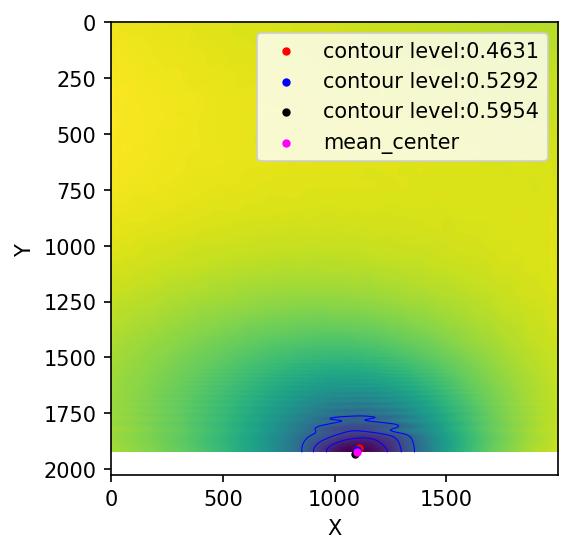

In [3]:
from skimage.measure import EllipseModel
import itertools

# Define the contour levels
contour_levels = np.asarray([0.7, 0.8, 0.90]) * np.max(interpolated_values)
print("max interpolated_values: " +str(np.max(interpolated_values)))

# Fit ellipses to the contours and find the centers
ellipse_centers = []
contour_list = []
for contour_level in contour_levels:
    # Find the contours at the current contour level
    contours = find_contours(interpolated_values, contour_level)

    # Fit ellipses to the contours and find the centers
    for contour in contours:
        model = EllipseModel()
        model.estimate(contour)
        center = model.params[0:2]
        print("ellipse center: " +str(center))
        ellipse_centers.append(center)
        contour_list.append(contour)

# Visualize the ellipse centers and contours
fig, ax = plt.subplots(dpi=150)

ellipse_centers = np.array(ellipse_centers)
colors = itertools.cycle(["red", "blue", "black"])
for i in range(ellipse_centers.shape[0]):
    ax.scatter(ellipse_centers[i, 1], ellipse_centers[i, 0], marker = '.', color=next(colors), label='contour level:' +str(f"{contour_levels[i]:.4f}"))

avg_center = np.mean(ellipse_centers[:,1])
print("Averaged pixel value for center of film along x direction: " +str(avg_center) + "  or " + str(int(avg_center)))
print("Averaged value for center of film along x direction in mm: " +str(avg_center * 5.5E-06 ) )
ax.scatter(avg_center, np.size(y1),   marker = '.', color='magenta', label='mean_center' )

ax.imshow(interpolated_values, cmap='viridis_r')
for contour in contour_list:
    ax.plot(contour[:, 1], contour[:, 0], 'b-', linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

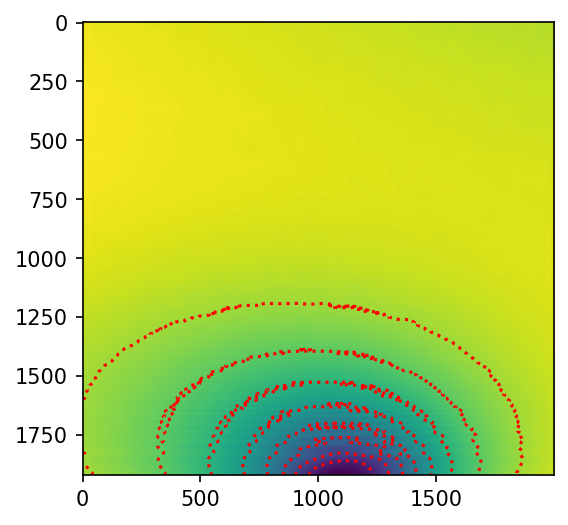

In [4]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

contour_level =  np.asarray([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) * np.max(interpolated_values)

fig,ax = plt.subplots(dpi = 150)
im1 = ax.imshow(interpolated_values, cmap='viridis_r')
#plt.colorbar(im1, cax=grid1.cbar_axes[0],  label='concentration, $mol /$ $m^{3}$')
ax.contour(interpolated_values, colors='red', linestyles='dotted', levels=contour_level)

# Define the contour level
#contour_level =  np.asarray([0.1,0.2,0.3,0.4,0.5,0.6]) * np.max(interpolated_values)
# contour_level =  np.asarray([0.5]) * np.max(interpolated_values)
# contour_list = []
# for contour_level in contour_levels:
#     # Find the contours at the current contour level
#     contours = find_contours(interpolated_values, contour_level)

#     # Fit ellipses to the contours and find the centers
#     for contour in contours:
#         contour_list.append(contour)

# # Plot the contours
# fig, ax = plt.subplots(dpi=150)
# ax.imshow(interpolated_values, cmap='viridis_r')
# for contour in contour_list:
#     ax.plot(contour[:, 1], contour[:, 0], 'b-', linewidth=0.5)
# ax.set_xlim(0, len(x1)-1)
# ax.set_ylim(len(y1)-1, 0)
# ax.set_aspect('equal')
# plt.show()

# contours = find_contours(interpolated_values, contour_level)
# # Reshape the array to remove the unnecessary dimensions
# reshaped_array = np.squeeze(contours)
# # Transpose the reshaped array to swap the x and y coordinates
# transposed_array = np.transpose(reshaped_array)
# # Split the transposed array into separate x and y arrays
# xc = transposed_array[0]
# yc = transposed_array[1]
# # Print the x and y arrays in (x, y) format
# a_points = list(zip(xc, yc))
# a_points = np.array(a_points)
# print(a_points.shape)
# print(a_points)
# x = a_points[:, 0]
# y = a_points[:, 1]

# ell = EllipseModel()
# ell.estimate(a_points)

# xc, yc, a, b, theta = ell.params

# print("center = ",  (yc, xc))
# print("angle of rotation = ",  theta)
# print("axes = ", (a,b))

# ax.scatter(xc, yc, color='black', s=100)


In [5]:
# import cv2

# # Define the contour levels
# contour_levels = np.asarray([ 0.90]) * np.max(interpolated_values)

# # Fit ellipses to the contours and find the centers
# ellipse_centers = []
# for contour_level in contour_levels:
#     # Find the contours at the current contour level
#     contours = find_contours(interpolated_values, contour_level)
#     # Reshape the array to remove the unnecessary dimensions
#     reshaped_array = np.squeeze(contours)

#     # Transpose the reshaped array to swap the x and y coordinates
#     transposed_array = np.transpose(reshaped_array)

#     # Split the transposed array into separate x and y arrays
#     xc = transposed_array[0]
#     yc = transposed_array[1]

#     # Print the x and y arrays in (x, y) format
#     coordinates = list(zip(xc, yc))
#     print(coordinates)
#     # Fit ellipses to the contours and find the centers
#     #for contour in coordinates:
#     ellipse = cv2.fitEllipse(coordinates)
#     center = ellipse[0]
#     ellipse_centers.append(center)

# # Visualize the ellipse centers
# fig, ax = plt.subplots()
# ellipse_centers = np.array(ellipse_centers)
# ax.scatter(ellipse_centers[:, 0], ellipse_centers[:, 1], c='red')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# plt.show()